# Polynomial Regression

In [ ]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

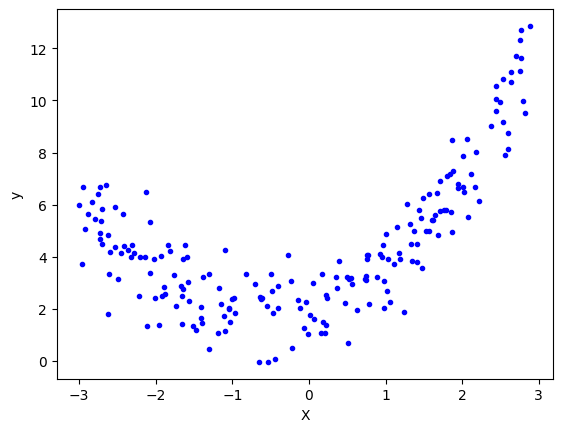

In [14]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [21]:
lr.coef_, lr.intercept_

(array([[0.88279437]]), array([4.48591175]))

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.06626345033768022

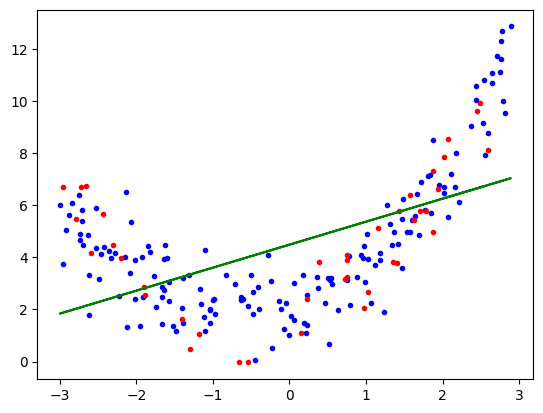

In [32]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'r.')
plt.plot(X_train, lr.predict(X_train), 'g')
plt.show()

## Now using polynomial

In [36]:
pol = PolynomialFeatures(degree=2)
X_train_pol = pol.fit_transform(X_train)
X_test_pol = pol.transform(X_test)

In [38]:
X_train_pol.shape, X_test_pol.shape

((160, 3), (40, 3))

In [40]:
lr_pol = LinearRegression()
lr_pol.fit(X_train_pol, y_train)

LinearRegression()

In [42]:
y_pred_pol = lr_pol.predict(X_test_pol)

In [43]:
lr_pol.coef_, lr.intercept_

(array([[0.        , 0.97956238, 0.75992272]]), array([2.17142588]))

In [46]:
r2 = r2_score(y_test, y_pred_pol)
r2

0.8285502681130923

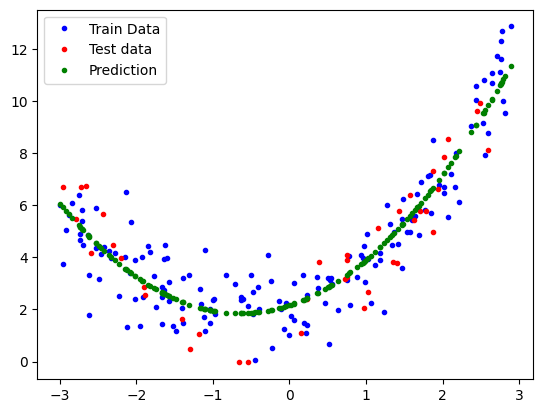

In [59]:
plt.plot(X_train, y_train, 'b.', label = 'Train Data')
plt.plot(X_test, y_test, 'r.', label = 'Test data')
plt.plot(X_train, lr_pol.predict(X_train_pol), 'g.', linewidth = 2, label = 'Prediction')
plt.legend()
plt.show()